In [1]:
import pandas as pd
import glob
import numpy as np
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\plele\\OneDrive - Université de Technologie de Troyes\\Fil_rouge'

In [3]:
glob.glob('./Tables_traitees/*')

['./Tables_traitees\\Communes_manquantes.csv',
 './Tables_traitees\\Infos_communes.csv',
 './Tables_traitees\\Infos_communes_avec_prix_estimé.csv',
 './Tables_traitees\\Population-Superficie_communes.csv',
 './Tables_traitees\\PrixMoy_m2_avec_code_commune.csv',
 './Tables_traitees\\Stations_carburant_avec_code_commune.csv',
 './Tables_traitees\\Stations_electriques_avec_code_commune.csv']

| N° | Dataframe | Description |
| -- | -- | -- |  
| 1. | df_elec | Bornes électriques |
| 2. | df_carb | Stations Carburant | 
| 3. | df_pop | Population et supéerficie commune | 
| 4. | df_com | Infos communes | 
| 5. | df_commune_immo | Prix au m2 | 
| 6. | df_commune_adj | Communes adjacentes | |

# Analyse des tables traitées

## df_elec - Bornes électriques

In [4]:
df_elec = pd.read_csv('./Tables_traitees\\Stations_electriques_avec_code_commune.csv', sep=';')

C:\Users\plele\AppData\Local\Temp\ipykernel_10608\2994795067.py:1: DtypeWarning: Columns (12,52,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_elec = pd.read_csv('./Tables_traitees\\Stations_electriques_avec_code_commune.csv', sep=';')


In [5]:
rename = {col:"1_"+col for col in df_elec.columns}
df_elec.rename(columns = rename, inplace=True)

In [6]:
df_elec.shape

(63715, 64)

In [7]:
df_elec.columns

Index(['1_Nom aménageur', '1_SIREN aménageur', '1_Contact aménageur',
       '1_Nom opérateur', '1_Contact opérateur', '1_Téléphone opérateur',
       '1_Nom enseigne', '1_ID station itinérance', '1_ID station local',
       '1_Nom station', '1_Implantation station', '1_Adresse station',
       '1_Code INSEE commune', '1_Coordonnées', '1_Nombre Points de charge',
       '1_ID PDC itinérance', '1_ID PDC local', '1_Puissance nominale',
       '1_Prise type E/F', '1_Prise type 2', '1_Prise type combo ccs',
       '1_Prise type chademo', '1_Prise type autre', '1_Gratuit',
       '1_Paiement acte', '1_Paiement CB', '1_Paiement autre',
       '1_Tarification', '1_Condition accès', '1_Réservation', '1_Horaires',
       '1_Accessibilité PMR', '1_Restriction gabarit', '1_Station deux roues',
       '1_Raccordement', '1_Num PDL', '1_Date mise en service',
       '1_Observations', '1_Date de Mise à Jour', '1_cable_t2_attache',
       '1_Dernière modification', '1_datagouv dataset id',
       '1_d

In [8]:
df_elec[df_elec['1_code_commune_n'].isna()].shape

(55, 64)

In [9]:
# df_elec[df_elec['1_code_commune_n'].isna()].to_csv('./Tables_traitees\\Communes_manquantes.csv', sep=';',index=False)

## df_carb - Stations Carburant

In [10]:
df_carb = pd.read_csv('./Tables_traitees\\Stations_carburant_avec_code_commune.csv', sep=';')

In [11]:
rename = {col:"2_"+col for col in df_carb.columns}
df_carb.rename(columns = rename, inplace=True)

In [12]:
df_carb.shape

(12450, 25)

In [13]:
df_carb.columns

Index(['2_Identifiant', '2_Code Postal', '2_Présence', '2_Adresse', '2_Ville',
       '2_Automate 24-24', '2_Timetable', '2_Carburant', '2_Rupture',
       '2_Mise à jour', '2_Prix Gazole', '2_Prix SP95', '2_Prix SP98',
       '2_Prix GPLc', '2_Prix E10', '2_Prix E85', '2_Services', '2_Marque',
       '2_Nom', '2_Geo Point', '2_Code INSEE', '2_Commune', '2_code_commune_n',
       '2_lat', '2_lon'],
      dtype='object')

In [14]:
df_carb.dtypes

2_Identifiant         int64
2_Code Postal         int64
2_Présence           object
2_Adresse            object
2_Ville              object
2_Automate 24-24     object
2_Timetable          object
2_Carburant          object
2_Rupture            object
2_Mise à jour        object
2_Prix Gazole       float64
2_Prix SP95         float64
2_Prix SP98         float64
2_Prix GPLc         float64
2_Prix E10          float64
2_Prix E85          float64
2_Services           object
2_Marque             object
2_Nom                object
2_Geo Point          object
2_Code INSEE         object
2_Commune            object
2_code_commune_n     object
2_lat               float64
2_lon               float64
dtype: object

In [15]:
df_carb[:3]

,2_Identifiant,2_Code Postal,2_Présence,2_Adresse,2_Ville,2_Automate 24-24,2_Timetable,2_Carburant,2_Rupture,2_Mise à jour,...,2_Prix E85,2_Services,2_Marque,2_Nom,2_Geo Point,2_Code INSEE,2_Commune,2_code_commune_n,2_lat,2_lon
0,14730002,14730,A,Autoroute de Normandie,GIBERVILLE,NaN,NaN,Gazole,"SP95,E85,GPLc",2020-01-06T12:44:00+01:00,...,NaN,NaN,Esso,ESSO GIBERVILLE,"49.16711, -0.28803",14301,GIBERVILLE,14301,49.167110,-0.288030
1,84550001,84550,A,A7 AIRE DE MORNAS VILLAGE,MORNAS,NaN,NaN,"Gazole,SP95,E85,GPLc,E10,SP98",NaN,2020-01-12T09:51:06+01:00,...,0.749000,"Restauration à emporter,Carburant additivé,Toi...",Carrefour,AIRE DE MORNAS VILLAGE (LES CROUSILLES),"44.2036953693, 4.72398720666",84083,MORNAS,84083,44.203695,4.723987
2,67202004,67202,R,"RN 4 Route de Saverne, Station Total Access",WOLFISHEIM,Oui,"{""Dimanche"": {""fermeture"": ""20.00"", ""ouvert"": ...","E85,E10,SP98","GPLc,SP95",2022-11-22T08:52:37+01:00,...,0.000929,"Relais colis,Boutique alimentaire,Boutique non...",NaN,NaN,NaN,67551,WOLFISHEIM,67551,NaN,NaN


In [16]:
len(df_carb['2_Identifiant'].unique())

10962

In [17]:
df_carb[df_carb['2_code_commune_n']=='11220']

,2_Identifiant,2_Code Postal,2_Présence,2_Adresse,2_Ville,2_Automate 24-24,2_Timetable,2_Carburant,2_Rupture,2_Mise à jour,...,2_Prix E85,2_Services,2_Marque,2_Nom,2_Geo Point,2_Code INSEE,2_Commune,2_code_commune_n,2_lat,2_lon
79,13014014,13014,R,26 CHEMIN DE SAINTE MARTHE,MARSEILLE,Oui,"{""Mardi"": {""ouverture"": ""00.00"", ""fermeture"": ...","Gazole,E10,SP98",NaN,2020-11-17T06:00:00+01:00,...,NaN,"Carburant additivé,Toilettes publiques,Boutiqu...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
206,13012023,13012,R,56 rue Saint Jean du desert,MARSEILLE,NaN,NaN,"SP95,SP98","E85,GPLc,E10",2018-05-18T09:32:57+02:00,...,NaN,"Carburant additivé,Toilettes publiques,Boutiqu...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
221,13014008,13014,R,26 Chemin de Sainte-Marthe,MARSEILLE,NaN,NaN,"Gazole,E10,SP98","SP95,E85,GPLc",2019-12-01T06:00:00+01:00,...,NaN,"Carburant additivé,Toilettes publiques,Boutiqu...",Agip,AGIP MARSEILLE SAINTE MARTHE,"43.3177505955, 5.37430169143",NaN,NaN,11220,43.317751,5.374302
275,13010012,13010,R,260 BOULEVARD PAUL CLAUDEL,MARSEILLE,Oui,"{""Dimanche"": {""ouvert"": 0}, ""Jeudi"": {""fermetu...","Gazole,SP98","E85,GPLc,E10,SP95",2022-09-29T15:20:30+02:00,...,NaN,"Boutique non alimentaire,Restauration à emport...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
415,13012015,13012,R,7 Chemin des Amaryllis,MARSEILLE,Non,"{""Dimanche"": {""ouvert"": 1}, ""Jeudi"": {""ouvert""...",Gazole,NaN,2021-08-05T08:00:00+02:00,...,NaN,"DAB (Distributeur automatique de billets),Lava...",Carrefour Market,SUPERMARCHÉ CARREFOUR MARKET,"43.31733, 5.43951",NaN,NaN,11220,43.317330,5.439510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11137,13012022,13012,R,67 AVENUE DES CAILLOLS,MARSEILLE,NaN,NaN,"Gazole,E85,E10,SP98",GPLc,2023-10-14T00:01:00+02:00,...,0.000994,"Boutique alimentaire,Restauration à emporter,S...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
11594,13003004,13003,R,83 BD DE PLOMBIERES,MARSEILLE,Non,"{""Dimanche"": {""fermeture"": ""20.00"", ""ouvert"": ...","Gazole,E85,E10,SP98",GPLc,2023-10-14T00:01:00+02:00,...,0.000994,"Boutique alimentaire,Boutique non alimentaire,...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
11595,13008014,13008,R,1 Avenue d'Odessa,MARSEILLE,Oui,"{""Dimanche"": {""ouvert"": 1}, ""Jeudi"": {""ouvert""...","Gazole,SP95,SP98","E85,GPLc,E10,E85,GPLc,E10",2023-10-11T07:08:32+02:00,...,NaN,"Boutique alimentaire,Boutique non alimentaire,...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
11596,13013016,13013,R,AVENUE FREDERIC MISTRAL,MARSEILLE,Oui,"{""Dimanche"": {""ouvert"": 1}, ""Jeudi"": {""ouvert""...","Gazole,E85,GPLc,E10,SP98",SP95,2023-10-14T00:01:00+02:00,...,0.000994,"Boutique alimentaire,Restauration à emporter,S...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN


## df_pop - Population & superficie communes

In [18]:
df_pop = pd.read_csv('./Tables_traitees\\Population-Superficie_communes.csv', sep=';',dtype={'Code département':str,'Code INSEE (commune ou arrondissement)':str })

In [19]:
rename = {col:"3_"+col for col in df_pop.columns}
df_pop.rename(columns = rename, inplace=True)

In [20]:
df_pop.shape

(36750, 16)

In [21]:
df_pop.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2'],
      dtype='object')

In [22]:
df_pop[:3]

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2
0,84.0,Auvergne-Rhône-Alpes,01,1.0,L' Abergement-Clémenciat,767.0,18.0,785.0,2016,2019,01001,15.65,Commune,200035210,CC Chalaronne Centre,49.009585
1,84.0,Auvergne-Rhône-Alpes,01,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016,2019,01002,9.13,Commune,240100883,CC de la Plaine de l'Ain,26.615553
2,84.0,Auvergne-Rhône-Alpes,01,4.0,Ambérieu-en-Bugey,14081.0,437.0,14518.0,2016,2019,01004,24.49,Commune,240100883,CC de la Plaine de l'Ain,574.969375


## df_com - Infos Communes

In [23]:
df_com = pd.read_csv('./Tables_traitees\\Infos_communes.csv', sep=';')

In [24]:
rename = {col:"4_"+col for col in df_com.columns}
df_com.rename(columns = rename, inplace=True)

In [25]:
df_com.shape

(36742, 20)

In [26]:
df_com.dtypes

4_Code INSEE              object
4_Code Postal             object
4_Commune                 object
4_Département             object
4_Région                  object
4_Statut                  object
4_Altitude Moyenne       float64
4_Superficie             float64
4_Population             float64
4_geo_point_2d            object
4_geo_shape               object
4_ID Geofla                int64
4_Code Commune             int64
4_Code Canton              int64
4_Code Arrondissement      int64
4_Code Département        object
4_Code Région              int64
4_lat                    float64
4_lon                    float64
4_Densité_hab_par_km2    float64
dtype: object

## df_commune_immo - Prix au m2

In [27]:
df_commune_immo = pd.read_csv('./Tables_traitees\\PrixMoy_m2_avec_code_commune.csv', sep=';')

In [28]:
rename = {col:"5_"+col for col in df_commune_immo.columns}
df_commune_immo.rename(columns = rename, inplace=True)

In [29]:
df_commune_immo.shape

(34886, 11)

In [30]:
df_commune_immo.columns

Index(['5_ID', '5_INSEE_COM', '5_INSEE_DEP', '5_INSEE_REG', '5_CODE_EPCI',
       '5_NOM_COM_M', '5_POPULATION', '5_Nb_Ventes', '5_PrixMoyen_M2',
       '5_nb_digits_code_INSEE', '5_code_commune_n'],
      dtype='object')

In [31]:
df_commune_immo.dtypes

5_ID                       object
5_INSEE_COM                object
5_INSEE_DEP                object
5_INSEE_REG                 int64
5_CODE_EPCI               float64
5_NOM_COM_M                object
5_POPULATION                int64
5_Nb_Ventes               float64
5_PrixMoyen_M2            float64
5_nb_digits_code_INSEE      int64
5_code_commune_n           object
dtype: object

In [32]:
df_commune_immo[:3]

,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n
0,COMMUNE_0000000009760754,32216,32,76,200072320.0,LOURTIES MONBRUN,152,NaN,NaN,5,32216
1,COMMUNE_0000000009756744,47033,47,75,200036523.0,BOUDY DE BEAUREGARD,412,4.0,1421.0,5,47033
2,COMMUNE_0000000009760252,32009,32,76,243200425.0,ARMOUS ET CAU,86,NaN,NaN,5,32009


In [33]:
len(df_commune_immo['5_code_commune_n'].unique())

34886

## df_commune_adj - Communes adjacentes

In [34]:
df_commune_adj = pd.read_csv('.\\Tables_brutes\\Communes_adjacentes\\communes_adjacentes_2022.csv',sep=',',dtype= {'insee':str})

In [35]:
rename = {col:"6_"+col for col in df_commune_adj.columns}
df_commune_adj.rename(columns = rename, inplace=True)

In [36]:
df_commune_adj.dtypes

6_insee            object
6_nom              object
6_nb_voisins        int64
6_insee_voisins    object
6_noms_voisins     object
6_cap_voisins      object
6_type             object
dtype: object

In [37]:
df_commune_adj.shape

(34990, 7)

In [38]:
df_commune_adj[:3]

,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type
0,01001,L'Abergement-Clémenciat,6,01412|01093|01028|01146|01351|01188,Sulignat|Châtillon-sur-Chalaronne|Baneins|Domp...,48|144|203|234|260|322,NaN
1,01002,L'Abergement-de-Varey,6,01056|01277|01384|01007|01363|01199,Boyeux-Saint-Jérôme|Nivollet-Montgriffon|Saint...,43|115|172|265|302|344,NaN
2,01004,Ambérieu-en-Bugey,7,01384|01421|01041|01345|01089|01007|01149,Saint-Rambert-en-Bugey|Torcieu|Bettant|Saint-D...,102|151|190|250|284|347|360,NaN


In [39]:
df_commune_adj[df_commune_adj['6_insee']=="01059"]

,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type


# Merge des dataframe

In [40]:
df = pd.DataFrame()
df = pd.merge(df_pop,df_commune_immo, left_on="3_Code INSEE (commune ou arrondissement)",
              right_on="5_code_commune_n",how="left")

In [41]:
df = pd.merge(df,df_commune_adj, left_on="3_Code INSEE (commune ou arrondissement)",
              right_on="6_insee",how="left")

In [42]:
df = pd.merge(df, df_com, left_on="3_Code INSEE (commune ou arrondissement)",
              right_on="4_Code INSEE",how="left")

In [43]:
# # ATTENTION
# df['Prix_estimé'] = df.apply(lambda x: estim_prix(x['Code INSEE (commune ou arrondissement)']),axis=1)
# df = pd.read_csv('./Tables_traitees\\Infos_communes_avec_prix_estimé.csv',sep=';',dtype={'Code département':str,'Code INSEE (commune ou arrondissement)':str,
                    # "INSEE_DEP":str,"ID":str,"INSEE_COM":str,"code_commune_n":str,"insee":str,"Code INSEE":str,"Code Département":str })

In [44]:
df.shape

(36750, 54)

In [45]:
df.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '6_insee', '6_nom', '6_nb_voisins',
       '6_insee_voisins', '6_noms_voisins', '6_cap_voisins', '6_type',
       '4_Code INSEE', '4_Code Postal', '4_Commune', '4_Département',
       '4_Région', '4_Statut', '4_Altitude Moyenne', '4_Superficie',
       '4_Population', '4_geo_point_2d', '4_geo_shape', '4_ID Geofla',
       '4_Code Commune', '4_Code Canton', '4_Code Arrondissement',
   

## Estimation des manquants prix moyen m2 

On commence par choisir les variables qui vont participer à l'imputation

In [46]:
sel_col = ['3_Code INSEE (commune ou arrondissement)','3_Code département', '5_PrixMoyen_M2', 
           'A_Prix_estimé_mean', 'A_Prix_consolidé_mean', 'B_Prix_estimé_median', 'B_Prix_consolidé_median', 
           '6_insee_voisins']

In [47]:
# correction d'une ligne (la seule, dont la superficie et la densité n'étaient pas remplies
df.loc[31441, '3_Superficie de la commune'] = 8.71
df.loc[31441, '3_Densité_hab_par_km2'] = 254.0/8.71
df.loc[31441,:]

3_Code région                                                                            28.0
3_Nom de la région                                                                  Normandie
3_Code département                                                                         76
3_Code commune                                                                          601.0
3_Nom de la commune                                                              Saint-Lucien
3_Population municipale                                                                 252.0
3_Population comptée à part                                                               2.0
3_Population totale                                                                     254.0
3_Année recensement                                                                      2016
3_Année utilisation                                                                      2019
3_Code INSEE (commune ou arrondissement)                    

In [48]:
df_m2 = df[df['5_PrixMoyen_M2'].isna()==False]
# df_m2[sel_col]

In [49]:
df_m2.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '6_insee', '6_nom', '6_nb_voisins',
       '6_insee_voisins', '6_noms_voisins', '6_cap_voisins', '6_type',
       '4_Code INSEE', '4_Code Postal', '4_Commune', '4_Département',
       '4_Région', '4_Statut', '4_Altitude Moyenne', '4_Superficie',
       '4_Population', '4_geo_point_2d', '4_geo_shape', '4_ID Geofla',
       '4_Code Commune', '4_Code Canton', '4_Code Arrondissement',
   

In [50]:
from sklearn.model_selection import KFold
nb_kfold = 5
rdm_state = 97
kf = KFold(n_splits=nb_kfold,shuffle=True, random_state = rdm_state)

### A-Par moyenne et B-médiane des communes avoisinantes

In [51]:
# On initialise les nouvelles variables
df['A_Prix_consolidé_mean'] = np.nan
df['A_Prix_estimé_mean'] = np.nan
df['B_Prix_consolidé_median'] = np.nan
df['B_Prix_estimé_median'] = np.nan
df['5_PrixMoyen_M2'] = df['5_PrixMoyen_M2'].astype(float)

In [52]:
# On crée un dictionnaire pour aller plus vite dans la recherche des communes voisines 
voisins_dict = df_commune_adj.set_index('6_insee')['6_insee_voisins'].to_dict()
df['A_Prix_consolidé_mean'] = df['5_PrixMoyen_M2']
df['B_Prix_consolidé_median'] = df['5_PrixMoyen_M2']

In [53]:
def estim_prix(code, vois, prix_mean, prix_median):
    try:
        # voisins = df_commune_adj.loc[df_commune_adj['insee']==code,'insee_voisins'].values[0].split('|')
        voisins = vois[str(code)].split('|')
        # print(voisins)
        prix_voisins_mean = list()
        prix_voisins_median = list()
        for v in voisins:
            try:
                # p = df.loc[df['Code INSEE (commune ou arrondissement)']==v,'Prix_consolidé'].values[0]
                p1 = prix_mean[str(v)]
                p2 = prix_median[str(v)]
            except:
                p1, p2 = None, None
            # nb = df.loc[df['Code INSEE (commune ou arrondissement)']==v,'Nb_Ventes'].values[0]
            prix_voisins_mean.append(float(p1))
            prix_voisins_median.append(float(p2))
        # print(code, voisins,prix_voisins)
        mean = np.nanmean(prix_voisins_mean)
        median = np.nanmedian(prix_voisins_median)
    except:
        mean = np.nan
        median = np.nan
    # print(code, mean, median)
    # print('-------')
    return pd.Series({'A_Prix_estimé_mean': mean, 'B_Prix_estimé_median': median})

In [54]:
%%time
n_iterations = 5
i=0
print('iteration:',i,'nbre de manquants:', sum(pd.isna(df['A_Prix_consolidé_mean'])))
while i<n_iterations:
    Prix_consolidé_dict_mean = df.set_index('3_Code INSEE (commune ou arrondissement)')['A_Prix_consolidé_mean'].to_dict()
    Prix_consolidé_dict_median = df.set_index('3_Code INSEE (commune ou arrondissement)')['B_Prix_consolidé_median'].to_dict()
    df[['A_Prix_estimé_mean', 'B_Prix_estimé_median']] = df.apply(lambda x: estim_prix(x['3_Code INSEE (commune ou arrondissement)'], 
                                                                                      voisins_dict, Prix_consolidé_dict_mean, 
                                                                                       Prix_consolidé_dict_median ),axis=1)
    df['A_Prix_consolidé_mean'] = df['A_Prix_estimé_mean']
    df['B_Prix_consolidé_median'] = df['B_Prix_estimé_median']
    df.loc[pd.notna(df['5_PrixMoyen_M2']),'A_Prix_consolidé_mean'] = df.loc[pd.notna(df['5_PrixMoyen_M2']), '5_PrixMoyen_M2'] 
    df.loc[pd.notna(df['5_PrixMoyen_M2']),'B_Prix_consolidé_median'] = df.loc[pd.notna(df['5_PrixMoyen_M2']), '5_PrixMoyen_M2'] 
    nb_manquants = sum(pd.isna(df['A_Prix_consolidé_mean']))
    i+=1
    print('iteration:',i,'nbre de manquants:',nb_manquants)

iteration: 0 nbre de manquants: 9928


C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3912908387.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\plele\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 1 nbre de manquants: 4075


C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3912908387.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\plele\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 2 nbre de manquants: 3495


C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3912908387.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\plele\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 3 nbre de manquants: 3238


C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3912908387.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\plele\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 4 nbre de manquants: 3047


C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3912908387.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\plele\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 5 nbre de manquants: 2868
CPU times: total: 1min 7s
Wall time: 1min 37s


In [55]:
estim_prix(df.loc[0,'3_Code INSEE (commune ou arrondissement)'], voisins_dict, Prix_consolidé_dict_mean, Prix_consolidé_dict_median)

A_Prix_estimé_mean      2167.5
B_Prix_estimé_median    2080.5
dtype: float64

In [56]:
estim_prix(df.loc[53,'3_Code INSEE (commune ou arrondissement)'], voisins_dict, Prix_consolidé_dict_mean, Prix_consolidé_dict_median)

A_Prix_estimé_mean     NaN
B_Prix_estimé_median   NaN
dtype: float64

In [57]:
estim_prix(df.loc[36745,'3_Code INSEE (commune ou arrondissement)'], voisins_dict, Prix_consolidé_dict_mean, Prix_consolidé_dict_median)

C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3912908387.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\plele\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


A_Prix_estimé_mean     NaN
B_Prix_estimé_median   NaN
dtype: float64

In [58]:
df.loc[:20, sel_col]

,3_Code INSEE (commune ou arrondissement),3_Code département,5_PrixMoyen_M2,A_Prix_estimé_mean,A_Prix_consolidé_mean,B_Prix_estimé_median,B_Prix_consolidé_median,6_insee_voisins
0,01001,01,1938.0,2167.500000,1938.000000,2080.5,1938.0,01412|01093|01028|01146|01351|01188
1,01002,01,1130.0,1503.894444,1130.000000,1458.5,1130.0,01056|01277|01384|01007|01363|01199
2,01004,01,2005.0,1725.714286,2005.000000,1678.0,2005.0,01384|01421|01041|01345|01089|01007|01149
3,01005,01,2442.0,2647.857143,2442.000000,2701.0,2442.0,01382|01207|01261|01362|01318|01398|01446
4,01006,01,1155.0,1460.333333,1155.000000,1287.0,1155.0,01358|01110|01117|01216|01233|01190
5,01007,01,1963.0,1739.555556,1963.000000,1731.0,1963.0,01363|01002|01384|01149|01004|01089|01314|0143...
6,01008,01,1940.0,1789.200000,1940.000000,1693.0,1940.0,01041|01431|01202|01213|01345
7,01009,01,966.0,1388.400000,966.000000,1286.0,966.0,01098|01034|01015|01358|01116
8,01010,01,1970.0,1812.571429,1970.000000,1723.0,1970.0,01407|74269|73180|73286|01138|01453|01118
9,01011,01,889.0,1569.142857,889.000000,1552.0,889.0,01087|01269|01265|01237|01181|01031|01283


In [59]:
df_prix_na = df[df['A_Prix_consolidé_mean'].isna()]

In [60]:
df_prix_na.shape

(2868, 58)

In [61]:
print(len(df_prix_na.loc[pd.isna(df_prix_na['6_insee_voisins']),sel_col]))
df_prix_na.loc[pd.isna(df_prix_na['6_insee_voisins']),sel_col]

1750


,3_Code INSEE (commune ou arrondissement),3_Code département,5_PrixMoyen_M2,A_Prix_estimé_mean,A_Prix_consolidé_mean,B_Prix_estimé_median,B_Prix_consolidé_median,6_insee_voisins
53,01059,01,NaN,NaN,NaN,NaN,NaN,NaN
83,01091,01,NaN,NaN,NaN,NaN,NaN,NaN
89,01097,01,NaN,NaN,NaN,NaN,NaN,NaN
111,01119,01,NaN,NaN,NaN,NaN,NaN,NaN
113,01122,01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
36183,91222,91,NaN,NaN,NaN,NaN,NaN,NaN
36510,95259,95,NaN,NaN,NaN,NaN,NaN,NaN
36630,97110,971,NaN,NaN,NaN,NaN,NaN,NaN
36648,97130,971,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
print(len(df_prix_na.loc[~pd.isna(df_prix_na['6_insee_voisins']),sel_col]))
df_prix_na.loc[~pd.isna(df_prix_na['6_insee_voisins']),sel_col]

1118


,3_Code INSEE (commune ou arrondissement),3_Code département,5_PrixMoyen_M2,A_Prix_estimé_mean,A_Prix_consolidé_mean,B_Prix_estimé_median,B_Prix_consolidé_median,6_insee_voisins
11330,2B052,2B,NaN,NaN,NaN,NaN,NaN,2B176|2B219|2B222|2B304|2B267
11337,2B063,2B,NaN,NaN,NaN,NaN,NaN,2B291|2B256|2B067|2B234|2B045|2B068|2B221
11338,2B067,2B,NaN,NaN,NaN,NaN,NaN,2B256|2B338|2B234|2B063
11340,2B069,2B,NaN,NaN,NaN,NaN,NaN,2B206|2B166|2B214|2B246|2B255|2B241|2B125|2B195
11341,2B072,2B,NaN,NaN,NaN,NaN,NaN,2B245|2B252|2B299|2B273|2B214|2B280
...,...,...,...,...,...,...,...,...
36745,97613,976,NaN,NaN,NaN,NaN,NaN,97602|97617|97601
36746,97614,976,NaN,NaN,NaN,NaN,NaN,97611|97607|97606|97616|97605|97617
36747,97615,976,NaN,NaN,NaN,NaN,NaN,97608
36748,97616,976,NaN,NaN,NaN,NaN,NaN,97614|97606|97605


In [63]:
df_prix_na.loc[~pd.isna(df_prix_na['6_insee_voisins']),'3_Code département'].unique()

array(['2B', '57', '67', '68', '971', '972', '973', '974', '976'],
      dtype=object)

2 cas pour ceux qui n'ont pas de prix consolidé
- soit ils n'ont pas de voisins identifiés
- soit ils ont des voisins mais n'ont pas de prix, en DOM TOM, départements 97X

In [64]:
# Valeurs uniques par colonne
df_analyse = []
manquantes = df.isna().sum()
for t in df.columns:
    row = {}
    row['Variable']=t
    row['type']= df[t].dtypes
    row['Nb_val_unique']=len(df[t].unique())
    row['Nb_manquant']=manquantes[t]
    df_analyse.append(row)
df_analyse = pd.DataFrame(df_analyse)
df_analyse.sort_values(by='Nb_manquant',ascending=False)

,Variable,type,Nb_val_unique,Nb_manquant
33,6_type,object,9,35990
24,5_PrixMoyen_M2,float64,3709,9928
23,5_Nb_Ventes,float64,554,9928
57,B_Prix_estimé_median,float64,8138,2985
55,A_Prix_estimé_mean,float64,28641,2985
56,B_Prix_consolidé_median,float64,6226,2868
54,A_Prix_consolidé_mean,float64,10317,2868
20,5_CODE_EPCI,float64,1237,1916
21,5_NOM_COM_M,object,32430,1867
26,5_code_commune_n,object,34884,1867


In [65]:
# Ceux qui n'ont pas de prix estimé parce les voisins n'en n'ont pas
df_na = df[df['A_Prix_estimé_mean'].isna() & df['6_insee_voisins'].notna()]
len(df_na)
df_na[:3]

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,...,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,A_Prix_consolidé_mean,A_Prix_estimé_mean,B_Prix_consolidé_median,B_Prix_estimé_median
4405,93.0,Provence-Alpes-Côte d'Azur,13,2.0,Allauch,21228.0,256.0,21484.0,2016,2019,...,3.0,13,93.0,43.353315,5.511348,369.267421,3731.0,NaN,3731.0,NaN
4408,93.0,Provence-Alpes-Côte d'Azur,13,5.0,Aubagne,45290.0,421.0,45711.0,2016,2019,...,3.0,13,93.0,43.293484,5.563313,849.744712,3046.0,NaN,3046.0,NaN
4425,93.0,Provence-Alpes-Côte d'Azur,13,22.0,Cassis,7162.0,103.0,7265.0,2016,2019,...,3.0,13,93.0,43.223047,5.551178,298.051204,6303.0,NaN,6303.0,NaN


In [66]:
print(len(df[df['5_PrixMoyen_M2'].isna()]))
print(len(df[df['A_Prix_consolidé_mean'].isna()]))
print(len(df[df['B_Prix_consolidé_median'].isna()]))

9928
2868
2868


In [67]:
df[df['A_Prix_estimé_mean'].isna() & df['A_Prix_consolidé_mean'].notna()].head()

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,...,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,A_Prix_consolidé_mean,A_Prix_estimé_mean,B_Prix_consolidé_median,B_Prix_estimé_median
4405,93.0,Provence-Alpes-Côte d'Azur,13,2.0,Allauch,21228.0,256.0,21484.0,2016,2019,...,3.0,13,93.0,43.353315,5.511348,369.267421,3731.0,NaN,3731.0,NaN
4408,93.0,Provence-Alpes-Côte d'Azur,13,5.0,Aubagne,45290.0,421.0,45711.0,2016,2019,...,3.0,13,93.0,43.293484,5.563313,849.744712,3046.0,NaN,3046.0,NaN
4425,93.0,Provence-Alpes-Côte d'Azur,13,22.0,Cassis,7162.0,103.0,7265.0,2016,2019,...,3.0,13,93.0,43.223047,5.551178,298.051204,6303.0,NaN,6303.0,NaN
4472,93.0,Provence-Alpes-Côte d'Azur,13,70.0,La Penne-sur-Huveaune,6433.0,60.0,6493.0,2016,2019,...,3.0,13,93.0,43.277208,5.518509,1730.769231,3486.0,NaN,3486.0,NaN
4473,93.0,Provence-Alpes-Côte d'Azur,13,71.0,Les Pennes-Mirabeau,21361.0,276.0,21637.0,2016,2019,...,1.0,13,93.0,43.402679,5.315471,581.257414,3457.0,NaN,3457.0,NaN


In [68]:
for i,x in df.iterrows():
    if pd.notna(x['5_PrixMoyen_M2']) & pd.notna(x['A_Prix_estimé_mean']):
        df.loc[i,'A_delta_prix_mean']=x['5_PrixMoyen_M2']-x['A_Prix_estimé_mean']
        df.loc[i,'B_delta_prix_median']=x['5_PrixMoyen_M2']-x['B_Prix_estimé_median']
    else:
        df.loc[i,'A_delta_prix_mean']= np.nan
        df.loc[i,'B_delta_prix_median']= np.nan

In [69]:
# df.to_csv(r'C:\Users\nimod\OneDrive - Université de Technologie de Troyes\Fil_rouge\Tables_traitees\Infos_communes_avec_prix_estimé.csv',sep=';',index=False)

C:\Users\plele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='A_delta_prix_mean', ylabel='Count'>

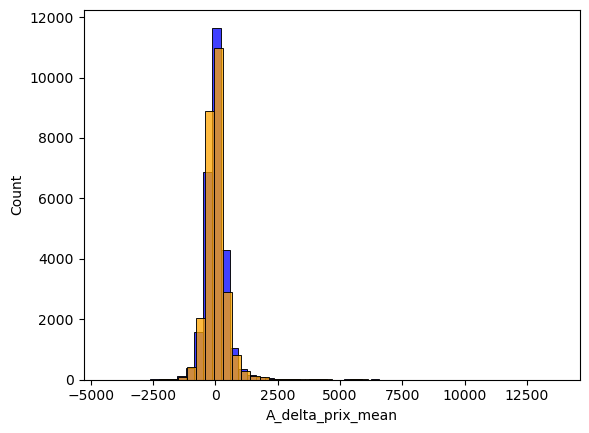

In [70]:
sns.histplot(data=df, x='A_delta_prix_mean', bins=50, kde=False, color='blue')
sns.histplot(data=df, x='B_delta_prix_median', bins=50, kde=False, color='orange')

In [71]:
df[['A_delta_prix_mean','B_delta_prix_median']].describe()

,A_delta_prix_mean,B_delta_prix_median
count,26705.000000,26705.000000
mean,2.715839,33.783485
std,462.609521,460.227477
min,-4384.000000,-4384.000000
25%,-221.333333,-186.500000
50%,-21.666667,0.000000
75%,186.900000,197.500000
max,13294.111111,13705.000000


<Axes: >

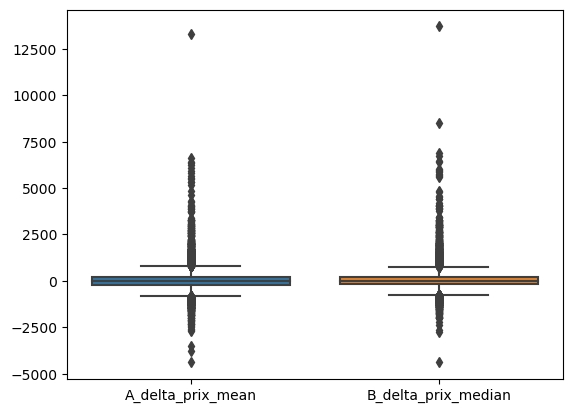

In [72]:
sns.boxplot(data=df[['A_delta_prix_mean','B_delta_prix_median']])

In [73]:
df.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '6_insee', '6_nom', '6_nb_voisins',
       '6_insee_voisins', '6_noms_voisins', '6_cap_voisins', '6_type',
       '4_Code INSEE', '4_Code Postal', '4_Commune', '4_Département',
       '4_Région', '4_Statut', '4_Altitude Moyenne', '4_Superficie',
       '4_Population', '4_geo_point_2d', '4_geo_shape', '4_ID Geofla',
       '4_Code Commune', '4_Code Canton', '4_Code Arrondissement',
   

In [74]:
df_m2.shape

(26822, 54)

In [75]:
df_m2['A_Prix_estimé_mean'] = df['A_Prix_estimé_mean'][df['5_PrixMoyen_M2'].isna() == False]
df_m2['B_Prix_estimé_median'] = df['B_Prix_estimé_median'][df['5_PrixMoyen_M2'].isna() == False]

C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3233834944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2['A_Prix_estimé_mean'] = df['A_Prix_estimé_mean'][df['5_PrixMoyen_M2'].isna() == False]
C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3233834944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2['B_Prix_estimé_median'] = df['B_Prix_estimé_median'][df['5_PrixMoyen_M2'].isna() == False]


In [76]:
df_m2.shape

(26822, 56)

### C-Par moyenne et mediane de toute la variable PAUL

In [77]:
df_m2['C_Prix_estime_mean'] = np.round(np.mean(df_m2['5_PrixMoyen_M2']))
df_m2.shape

C:\Users\plele\AppData\Local\Temp\ipykernel_10608\404998799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2['C_Prix_estime_mean'] = np.round(np.mean(df_m2['5_PrixMoyen_M2']))


(26822, 57)

### D-Par KNN OUMAR

In [78]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Sélection des caractéristiques
features = ['3_Population municipale','5_PrixMoyen_M2', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']

# Création d'un DataFrame avec seulement les caractéristiques sélectionnées
data_subset = df[features]

# Remplacer les valeurs manquantes dans "5_PrixMoyen_M2" par NaN
data_subset['5_PrixMoyen_M2'] = data_subset['5_PrixMoyen_M2'].replace(0, np.nan)  # Assurez-vous de choisir la valeur qui représente une valeur manquante
data_subset['5_PrixMoyen_M2'] = pd.to_numeric(data_subset['5_PrixMoyen_M2'], errors='coerce')

# Imputer les valeurs manquantes avec KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data_subset)

# Normalisation des données
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_imputed)

# Créer un DataFrame avec les données normalisées et le nom des colonnes
columns = data_subset.columns
data_normalized_df = pd.DataFrame(data_normalized, columns=columns)

# Ajouter une colonne pour stocker les valeurs prédites par le KNN
data_normalized_df['0_KNN_predicted'] = imputer.transform(data_subset)[:, 1]

# Afficher toutes les données
print(data_normalized_df)


C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3688732853.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['5_PrixMoyen_M2'] = data_subset['5_PrixMoyen_M2'].replace(0, np.nan)  # Assurez-vous de choisir la valeur qui représente une valeur manquante
C:\Users\plele\AppData\Local\Temp\ipykernel_10608\3688732853.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['5_PrixMoyen_M2'] = pd.to_numeric(data_subset['5_PrixMoyen_M2'], errors='coerce')


       3_Population municipale  5_PrixMoyen_M2  3_Densité_hab_par_km2  \
0                     0.001613        0.109873               0.001220   
1                     0.000511        0.053968               0.000663   
2                     0.029617        0.114509               0.014314   
3                     0.003515        0.144745               0.002592   
4                     0.000231        0.055698               0.000454   
...                        ...             ...                    ...   
36745                 0.013529        0.092175               0.007479   
36746                 0.021460        0.119657               0.013827   
36747                 0.024066        0.202768               0.065332   
36748                 0.023465        0.151249               0.025248   
36749                 0.029308        0.084827               0.010128   

       3_Superficie de la commune  4_Superficie  4_Altitude Moyenne     4_lat  \
0                        0.000838      0.0

In [79]:
df['5_PrixMoyen_M2']

0        1938.0
1        1130.0
2        2005.0
3        2442.0
4        1155.0
          ...  
36745       NaN
36746       NaN
36747       NaN
36748       NaN
36749       NaN
Name: 5_PrixMoyen_M2, Length: 36750, dtype: float64

In [80]:
data_normalized_df['0_KNN_predicted']

0        1938.0
1        1130.0
2        2005.0
3        2442.0
4        1155.0
          ...  
36745    1682.2
36746    2079.4
36747    3280.6
36748    2536.0
36749    1576.0
Name: 0_KNN_predicted, Length: 36750, dtype: float64

In [81]:
# Vérifier les valeurs manquantes dans la colonne d'origine
#missing_values_before = df['5_PrixMoyen_M2'].isnull().sum()
#print(f"Nombre de valeurs manquantes dans '5_PrixMoyen_M2' avant l'imputation : {missing_values_before}")

# Imputer les valeurs manquantes avec KNNImputer dans le DataFrame d'origine
#df['5_PrixMoyen_M2'] = imputer.transform(df[features])[:, 1]

# Vérifier à nouveau les valeurs manquantes après l'imputation
#missing_values_after = df['5_PrixMoyen_M2'].isnull().sum()
#print(f"Nombre de valeurs manquantes dans '5_PrixMoyen_M2' après l'imputation : {missing_values_after}")

In [82]:
import matplotlib.pyplot as plt

# Extraire les valeurs réelles et prédites
actual_values = data_subset['5_PrixMoyen_M2'].values
predicted_values = data_normalized_df['5_PrixMoyen_M2_predicted'].values

# Créer un graphique de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--', linewidth=2)
plt.title('Valeurs Réelles vs Valeurs Prédites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.show()


KeyError: '5_PrixMoyen_M2_predicted'

In [ ]:
import matplotlib.pyplot as plt

# Extraire les valeurs réelles et prédites
actual_values = data_subset['5_PrixMoyen_M2'].values
predicted_values = data_normalized_df['5_PrixMoyen_M2_predicted'].values

# Créer un histogramme
plt.figure(figsize=(10, 6))
plt.hist([actual_values, predicted_values], bins=30, label=['Réel', 'Prédit'], alpha=0.7)
plt.legend()
plt.title('Histogramme des Valeurs Réelles et Prédites')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraire les valeurs réelles et prédites
actual_values = data_subset['5_PrixMoyen_M2'].values
predicted_values = data_normalized_df['5_PrixMoyen_M2_predicted'].values

# Créer un DataFrame pour Seaborn
data_for_seaborn = pd.DataFrame({'Réel': actual_values, 'Prédit': predicted_values})

# Créer un histogramme avec Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=data_for_seaborn, bins=30, kde=True)
plt.title('Histogramme des Valeurs Réelles et Prédites avec Seaborn')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()


In [ ]:
Delta= y_test - Y_pred

In [ ]:
df.columns

### E-Par KNeighborsRegressor OUMAR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 

data1=df[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon','5_PrixMoyen_M2']]
data1=data1.dropna()
data2=data1.sample(n=data1.shape[0],random_state=1)


data_train= data2[:16819]
data_test= data2[16820:data1.shape[0]]

X_train = data_train[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
y_train=data_train[['5_PrixMoyen_M2']]
X_test = data_test[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
y_test =data_test[['5_PrixMoyen_M2']]
neigh = KNeighborsRegressor(n_neighbors=50)

neigh.fit(X_train, y_train)


In [ ]:
neigh.score(X_test,y_test)

In [ ]:
Y_pred=neigh.predict(X_test)
Delta= y_test - Y_pred


In [ ]:
Delta.describe()

### F-Par RandomForestRegressor PAUL

In [88]:
pd.set_option('display.max_columns', None)
df_m2.head()
# pd.reset_option('max_columns')

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,A_Prix_estimé_mean,B_Prix_estimé_median,C_Prix_estime_mean
0,84.0,Auvergne-Rhône-Alpes,01,1.0,L' Abergement-Clémenciat,767.0,18.0,785.0,2016,2019,01001,15.65,Commune,200035210,CC Chalaronne Centre,49.009585,COMMUNE_0000000009750236,1001,1,84.0,200069193.0,ABERGEMENT CLEMENCIAT,767.0,7.0,1938.0,5.0,01001,01001,L'Abergement-Clémenciat,6.0,01412|01093|01028|01146|01351|01188,Sulignat|Châtillon-sur-Chalaronne|Baneins|Domp...,48|144|203|234|260|322,NaN,01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,RHONE-ALPES,242.0,1565.0,0.8,"46.153425521369456, 4.926113542231843","{""coordinates"": [[[4.92627342692396, 46.120051...",7342.0,1.0,10.0,2.0,01,82.0,46.153426,4.926114,51.118211,2167.500000,2080.5,1636.0
1,84.0,Auvergne-Rhône-Alpes,01,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016,2019,01002,9.13,Commune,240100883,CC de la Plaine de l'Ain,26.615553,COMMUNE_0000000009750692,1002,1,84.0,240100883.0,ABERGEMENT DE VAREY,243.0,8.0,1130.0,5.0,01002,01002,L'Abergement-de-Varey,6.0,01056|01277|01384|01007|01363|01199,Boyeux-Saint-Jérôme|Nivollet-Montgriffon|Saint...,43|115|172|265|302|344,NaN,01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,RHONE-ALPES,483.0,912.0,0.2,"46.009187877601306, 5.428016963625987","{""coordinates"": [[[5.430089291292173, 45.98275...",32385.0,2.0,1.0,1.0,01,82.0,46.009188,5.428017,21.929825,1503.894444,1458.5,1636.0
2,84.0,Auvergne-Rhône-Alpes,01,4.0,Ambérieu-en-Bugey,14081.0,437.0,14518.0,2016,2019,01004,24.49,Commune,240100883,CC de la Plaine de l'Ain,574.969375,COMMUNE_0000000009750944,1004,1,84.0,240100883.0,AMBERIEU EN BUGEY,14081.0,168.0,2005.0,5.0,01004,01004,Ambérieu-en-Bugey,7.0,01384|01421|01041|01345|01089|01007|01149,Saint-Rambert-en-Bugey|Torcieu|Bettant|Saint-D...,102|151|190|250|284|347|360,NaN,01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,RHONE-ALPES,379.0,2448.0,13.4,"45.96084751144621, 5.372925777699918","{""coordinates"": [[[5.386190824025674, 45.93092...",463.0,4.0,1.0,1.0,01,82.0,45.960848,5.372926,547.385621,1725.714286,1678.0,1636.0
3,84.0,Auvergne-Rhône-Alpes,01,5.0,Ambérieux-en-Dombes,1671.0,34.0,1705.0,2016,2019,01005,16.05,Commune,200042497,CC Dombes Saône Vallée,104.112150,COMMUNE_0000000009750958,1005,1,84.0,200042497.0,AMBERIEUX EN DOMBES,1671.0,13.0,2442.0,5.0,01005,01005,Ambérieux-en-Dombes,7.0,01382|01207|01261|01362|01318|01398|01446,Sainte-Olive|Lapeyrouse|Monthieux|Saint-Jean-d...,43|102|145|193|230|272|310,NaN,01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,RHONE-ALPES,290.0,1605.0,1.6,"45.99617998724963, 4.912272507964576","{""coordinates"": [[[4.895580369408855, 45.97991...",344.0,5.0,30.0,2.0,01,82.0,45.996180,4.912273,99.688474,2647.857143,2701.0,1636.0
4,84.0,Auvergne-Rhône-Alpes,01,6.0,Ambléon,110.0,6.0,116.0,2016,2019,01006,6.03,Commune,200040350,CC Bugey Sud,18.242123,COMMUNE_0000000009751732,1006,1,84.0,200040350.0,AMBLEON,110.0,1.0,1155.0,5.0,01006,01006,Ambléon,6.0,01358|01110|01117|01216|01233|01190,Saint-Germain-les-Paroisses|Colomieu|Conzieu|L...,37|120|164|263|308|341,NaN,01006,01300,AMBLEON,AIN,RHONE-ALPES,RHONE-ALPES,589.0,602.0,0.1,"45.749498904386975, 5.594320173657713","{""coordinates"": [[[5.6148546250532725, 45.7346...",16853.0,6.0,4.0,1.0,01,82.0,45.74949

In [115]:
df_verif_na = df_m2.drop(['6_type', 'A_Prix_estimé_mean', 'B_Prix_estimé_median', 'C_Prix_estime_mean', '5_CODE_EPCI', 
                         '6_insee', '6_nom', '6_nb_voisins', '6_insee_voisins', '6_noms_voisins', '6_cap_voisins'], axis=1)

In [155]:
df_verif_na[df_verif_na.isna().any(axis=1)]

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2
21385,44.0,Grand Est,55,138.0,Culey,146.0,3.0,149.0,2016,2019,55138,11.02,Commune,200033025,CA de Bar-Le-Duc - Sud Meuse,13.248639,COMMUNE_0000000333083363,55138,55,44.0,CULEY,146.0,1.0,972.0,5.0,55138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30942,28.0,Normandie,76,95.0,Bihorel,8301.0,186.0,8487.0,2016,2019,76095,2.54,Commune,200023414,Métropole Rouen Normandie,3268.110236,COMMUNE_0000000331921304,76095,76,28.0,BIHOREL,8301.0,77.0,2076.0,5.0,76095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31441,28.0,Normandie,76,601.0,Saint-Lucien,252.0,2.0,254.0,2016,2019,76601,8.71,Commune,NaN,NaN,29.161883,COMMUNE_0000002000704162,76601,76,28.0,SAINT LUCIEN,252.0,6.0,1548.0,5.0,76601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_m2.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '6_insee', '6_nom', '6_nb_voisins',
       '6_insee_voisins', '6_noms_voisins', '6_cap_voisins', '6_type',
       '4_Code INSEE', '4_Code Postal', '4_Commune', '4_Département',
       '4_Région', '4_Statut', '4_Altitude Moyenne', '4_Superficie',
       '4_Population', '4_geo_point_2d', '4_geo_shape', '4_ID Geofla',
       '4_Code Commune', '4_Code Canton', '4_Code Arrondissement',
   

In [109]:
X_rf.loc[:,'3_Code département'].astype(object)

0        01
1        01
2        01
3        01
4        01
         ..
36616    95
36617    95
36618    95
36619    95
36620    95
Name: 3_Code département, Length: 26822, dtype: object

In [113]:
26822*0.9


24139.8

In [136]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
        
# X=df_m2[['3_Code région', '3_Code département', '3_Population municipale', '3_Population comptée à part', 
#              '3_Population totale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '3_Statut', 
#              '4_Superficie','4_Altitude Moyenne','4_lat','4_lon','5_PrixMoyen_M2']]
X_rf = df_m2[['3_Code région', '3_Code département', '3_Population municipale', '3_Population comptée à part', 
             '3_Population totale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '3_Statut']]
y_rf = df_m2[['5_PrixMoyen_M2']]

X_rf_train = X_rf.loc[:24000,:]
y_rf_train = y_rf.loc[:24000]
X_rf_test = X_rf.loc[24001:,:]
y_rf_test = y_rf.loc[24001:]

# X_rf_train = X_rf.loc[:10000,:]
# y_rf_train = y_rf.loc[:10000]
# X_rf_test = X_rf.loc[24001:,:]
# y_rf_test = y_rf.loc[24001:]

cat = ['3_Code région', '3_Code département', '3_Statut']
for c in cat:
     X_rf.loc[:,c] = X_rf.loc[:,c].astype(object)

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
print(cat_selector(X_rf))
print(num_selector(X_rf))

['3_Code région', '3_Code département', '3_Statut']
['3_Population municipale', '3_Population comptée à part', '3_Population totale', '3_Densité_hab_par_km2', '3_Superficie de la commune']


In [137]:
cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    encoded_missing_value=-2,
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000180A96AF590>),
                                ('ordinalencoder',
                                 OrdinalEncoder(encoded_missing_value=-2,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000180AB6813D0>)])

In [138]:
rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=0, n_jobs = -1))
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000180A96AF590>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000180AB6813D0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=0))])

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
param_grid = {
    # 'randomforestregressor__n_estimators': [100, 200, 300, 400],
    'randomforestregressor__max_depth': [15, 30, 35],
    'randomforestregressor__max_features': [2, 3, 4],
    # 'randomforestregressor__min_samples_leaf': [2, 3, 4, 5],
    'randomforestregressor__min_samples_split': [10, 12, 14]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    scoring='r2',  # Choisissez la métrique appropriée
    cv=kf
)

grid_search.fit(X_rf_train, y_rf_train.values.ravel())

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluer la performance du modèle sur les données de test
test_score = cross_val_score(grid_search.best_estimator_, X_rf_test, y_rf_test.values.ravel(), cv=kf, scoring='r2')
print("Performance sur les données de test:", test_score.mean())

Meilleurs paramètres: {'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 4, 'randomforestregressor__min_samples_split': 14}
Performance sur les données de test: 0.6748938245960021


0.14810055282201862


C:\Users\plele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

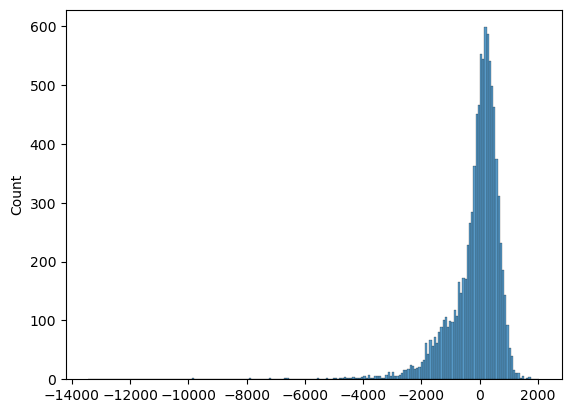

In [181]:
y_pred = grid_search.best_estimator_.predict(X_rf_test)
print(grid_search.best_estimator_.score(X_rf_test, y_rf_test.values.ravel()))
sns.histplot(data=y_pred-y_rf_test.values.ravel())

<Axes: >

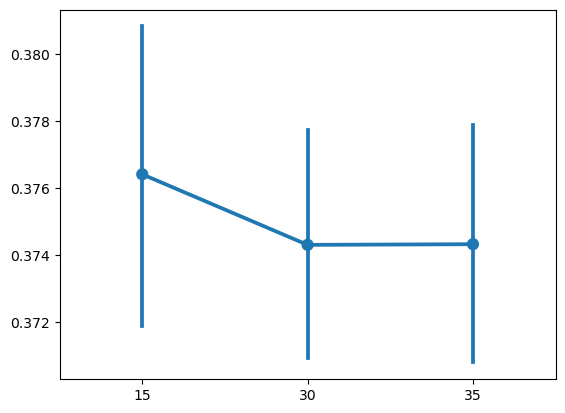

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

depth = grid_search.cv_results_['param_randomforestregressor__max_depth'].data
features = grid_search.cv_results_['param_randomforestregressor__max_features'].data
split = grid_search.cv_results_['param_randomforestregressor__min_samples_split'].data
results = grid_search.cv_results_['mean_test_score']
sns.pointplot(x=depth, y=results)

<Axes: >

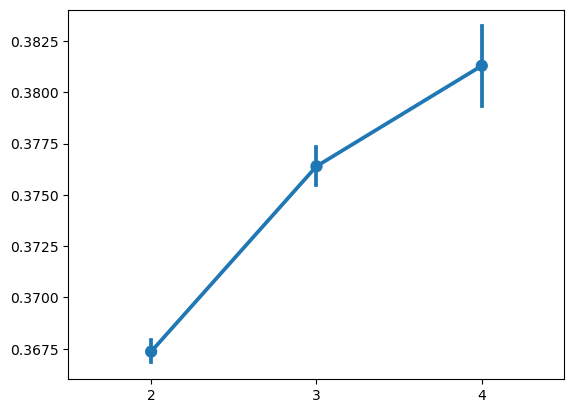

In [167]:
sns.pointplot(x=features, y=results)

<Axes: >

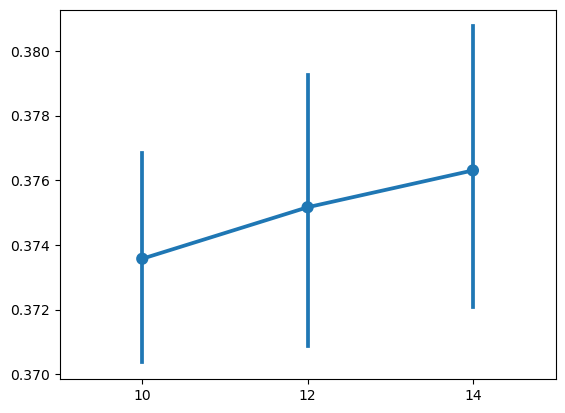

In [168]:
sns.pointplot(x=split, y=results)

In [170]:
grid_search.cv_results_['mean_test_score']

array([0.36792875, 0.36696718, 0.36646012, 0.37619591, 0.37885793,
       0.37860551, 0.38256773, 0.38395756, 0.38619038, 0.36735975,
       0.36674781, 0.36832565, 0.37459868, 0.37616116, 0.3761768 ,
       0.37659708, 0.38000868, 0.38279035, 0.36611851, 0.36767072,
       0.36867496, 0.37435098, 0.3757985 , 0.37679125, 0.3764589 ,
       0.38033844, 0.38274381])

C:\Users\plele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

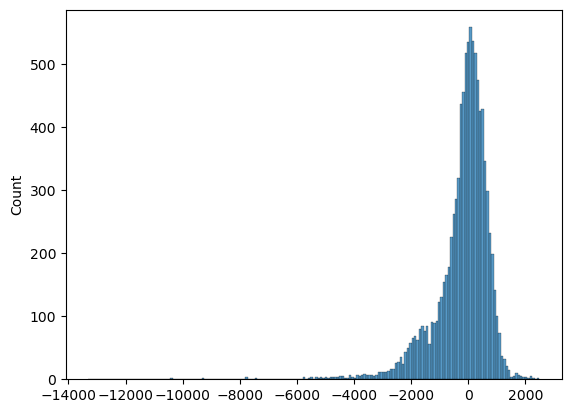

In [177]:
rf_pipeline_test = make_pipeline(tree_preprocessor, RandomForestRegressor(max_depth=15, random_state=0, n_jobs = -1))
rf_pipeline_test.fit(X_rf_train, y_rf_train.values.ravel())
rf_pipeline_test.score(X_rf_test, y_rf_test.values.ravel())

y_pred = rf_pipeline_test.predict(X_rf_test)

sns.histplot(data=y_pred-y_rf_test.values.ravel())

In [108]:
        
l_profondeur = np.arange(5, 30, 5)
rf_score = []

for train, test in kf.split(X_rf):
    # X_train = X[train,:]
    # y_train = y[train]
    # X_test = X[test,:]
    # y_test = y[test]
    X_train = X_rf.iloc[train,:]
    y_train = y_rf.iloc[train]
    X_test = X_rf.iloc[test,:]
    y_test = y_rf.iloc[test]
    
    for prof in l_profondeur:
        rf = make_pipeline(RandomForestRegressor(max_depth=prof, random_state=0, n_jobs = 10))
        rf.fit(X_train, y_train)
        rf_score.append(rf.score(X_test, y_test))

res_rf_score = np.reshape(rf_score, [nb_kfold, l_profondeur.shape[0]])
res_rf_score = np.mean(res_rf_score, axis = 0)
indice_max = np.unravel_index(np.argmax(res_rf_score), res_rf_score.shape)
print('Indices Best score :', indice_max)
print('Best score :', np.max(res_rf_score))
print('Profondeur best score :', l_profondeur[indice_max])
# data2=data1.sample(n=data1.shape[0],random_state=1)


# data_train= data2[:16819]
# data_test= data2[16820:data1.shape[0]]

# X_train = data_train[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
# y_train=data_train[['5_PrixMoyen_M2']]
# X_test = data_test[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
# y_test =data_test[['5_PrixMoyen_M2']]
# rf = RandomForestRegressor(max_depth=20, random_state=0)

# rf.fit(X_train, y_train)


ValueError: could not convert string to float: '2A'

In [ ]:
rf.score(X_test,y_test)

In [ ]:
Y_pred_rf=rf.predict(X_test)
Delta_rf= y_test['5_PrixMoyen_M2'] - Y_pred_rf
Delta_rf.describe()

In [ ]:
Y_pred_rf.shape

In [ ]:
Y_pred[0:]

In [ ]:
y_test['5_PrixMoyen_M2']

In [ ]:
y_test.shape

In [ ]:
Y_pred=rf.predict(X_test)

In [ ]:

y_test

### G-Par Bayesian Ridge NICOLAS

### Idem avec Pipeline Example

In [ ]:
from sklearn.impute import IterativeImputer, SimpleImputer

In [ ]:
data1=df[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon','5_PrixMoyen_M2']]
data1=data1.dropna()
data2=data1.sample(n=data1.shape[0],random_state=1)

In [ ]:
data_train= data2[:16819]
data_test= data2[16820:data1.shape[0]]

In [ ]:
X_train = data_train[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
y_train=data_train[['5_PrixMoyen_M2']]
X_test = data_test[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
y_test =data_test[['5_PrixMoyen_M2']]

In [ ]:
# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ("mean", "median"):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy), br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )

In [ ]:
# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    RandomForestRegressor(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=2,
        random_state=0,
    ),
    make_pipeline(
        Nystroem(kernel="polynomial", degree=2, random_state=0), Ridge(alpha=1e3)
    ),
    KNeighborsRegressor(n_neighbors=15),
]
score_iterative_imputer = pd.DataFrame()
# iterative imputer is sensible to the tolerance and
# dependent on the estimator used internally.
# we tuned the tolerance to keep this example run with limited computational
# resources while not changing the results too much compared to keeping the
# stricter default value for the tolerance parameter.
tolerances = (1e-3, 1e-1, 1e-1, 1e-2)
for impute_estimator, tol in zip(estimators, tolerances):
    estimator = make_pipeline(
        IterativeImputer(
            random_state=0, estimator=impute_estimator, max_iter=25, tol=tol
        ),
        br_estimator,
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )

### Comparaison des différents du prix moyen au m2 NICOLAS